# Importación de liberías

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Carga de dataframes y analisis exploratorio

In [418]:
ds_ab = pd.read_csv(r'Inputs\dataset_alpha_betha.csv',sep=',')
ds_demand = pd.read_csv(r'Inputs\dataset_demand_acumulate.csv',sep=',')
ds_predict = pd.read_csv(r'Inputs\to_predict.csv',sep=',')

In [419]:
print(ds_ab.head()) #
print(ds_demand.head())
print(ds_predict.head())

       autoID  SeniorCity Partner Dependents Service1          Service2  \
0  7590-VHVEG           0     Yes         No       No  No phone service   
1  5575-GNVDE           0      No         No      Yes                No   
2  3668-QPYBK           0      No         No      Yes                No   
3  7795-CFOCW           0      No         No       No  No phone service   
4  9237-HQITU           0      No         No      Yes                No   

  Security OnlineBackup DeviceProtection TechSupport        Contract  \
0       No          Yes               No          No  Month-to-month   
1      Yes           No              Yes          No        One year   
2      Yes          Yes               No          No  Month-to-month   
3      Yes           No              Yes         Yes        One year   
4       No           No               No          No  Month-to-month   

  PaperlessBilling              PaymentMethod  Charges   Demand  Class  
0              Yes           Electronic che

In [420]:
ds_ab.head()

,autoID,SeniorCity,Partner,Dependents,Service1,Service2,Security,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges,Demand,Class
0,7590-VHVEG,0,Yes,No,No,No phone service,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Alpha
1,5575-GNVDE,0,No,No,Yes,No,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,Alpha
2,3668-QPYBK,0,No,No,Yes,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Betha
3,7795-CFOCW,0,No,No,No,No phone service,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,Alpha
4,9237-HQITU,0,No,No,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Betha


In [421]:
ds_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   autoID            7043 non-null   object 
 1   SeniorCity        7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Service1          7043 non-null   object 
 5   Service2          7043 non-null   object 
 6   Security          7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  Charges           7043 non-null   float64
 14  Demand            7043 non-null   object 
 15  Class             7043 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory

In [422]:
ds_ab.apply(pd.Series.unique)

autoID              [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
SeniorCity                                                     [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
Service1                                                    [No, Yes]
Service2                                  [No phone service, No, Yes]
Security                               [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
Contract                         [Month-to-month, One year, Two year]
PaperlessBilling                                            [Yes, No]
PaymentMethod       [Electronic check, Mailed check, Bank transfer...
Charges             [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...
Demand              

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

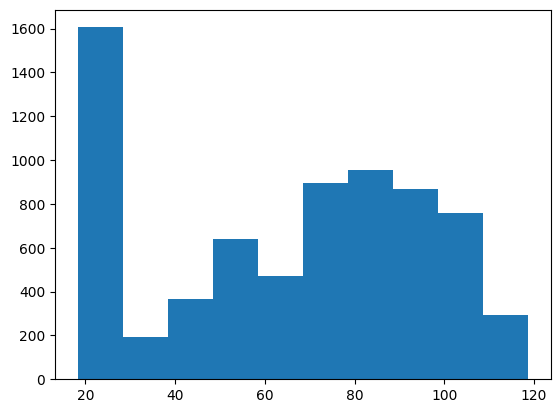

In [423]:
plt.hist(ds_ab['Charges'])

(array([799., 742., 721., 708., 715., 696., 674., 670., 659., 659.]),
 array([   0.,  653., 1306., 1959., 2612., 3265., 3918., 4571., 5224.,
        5877., 6530.]),
 <BarContainer object of 10 artists>)

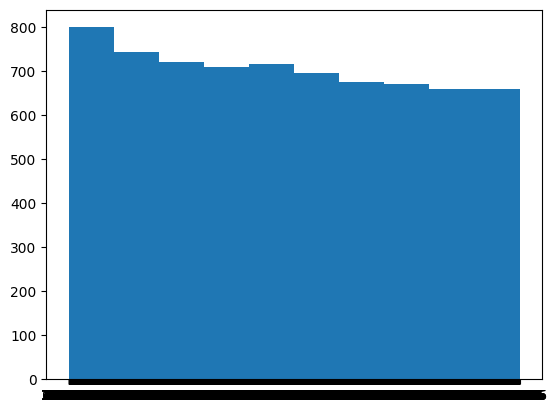

In [424]:
plt.hist(ds_ab['Demand'])

In [425]:
ds_ab.describe()

,SeniorCity,Charges
count,7043.000000,7043.000000
mean,0.162147,64.761692
std,0.368612,30.090047
min,0.000000,18.250000
25%,0.000000,35.500000
50%,0.000000,70.350000
75%,0.000000,89.850000
max,1.000000,118.750000


In [426]:
ds_ab_heatmap = ds_ab.copy()
ds_ab_heatmap.drop(columns='autoID',axis=1,inplace=True)

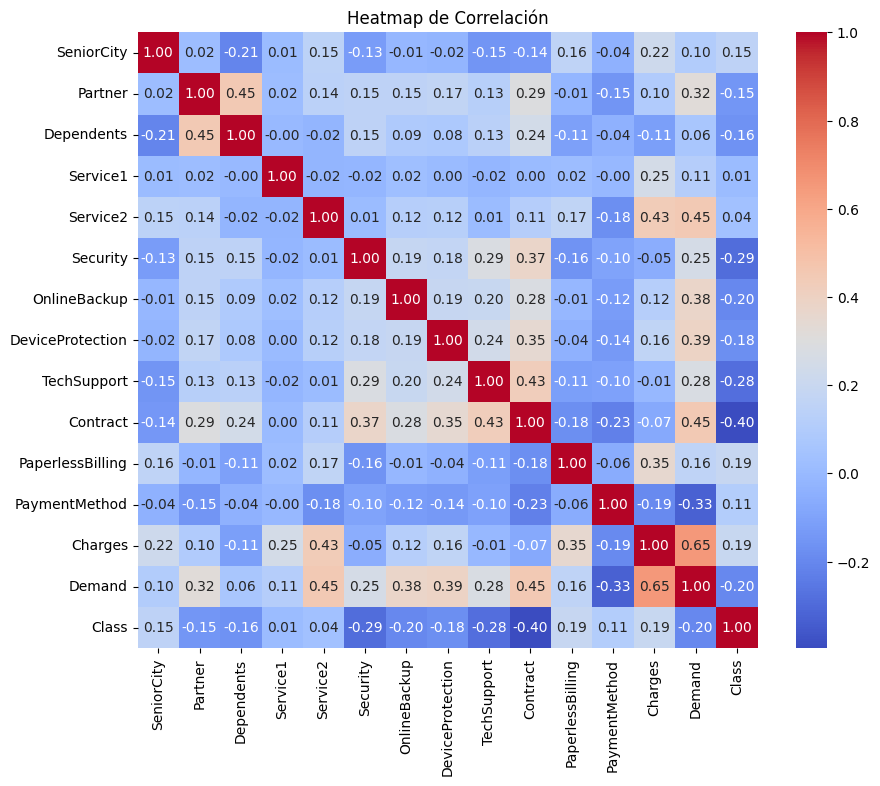

In [427]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Convertir columnas categóricas a números
categorical_columns = ['Partner', 'Dependents', 'Service1', 'Service2', 'Security', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod', 'Class']

for col in categorical_columns:
    ds_ab_heatmap[col] = le.fit_transform(ds_ab_heatmap[col])
    
# Reemplazar las cadenas vacías con NaN
ds_ab_heatmap.replace(' ', np.nan, inplace=True)

#Crear la matriz de correlación de las columnas numéricas
# Seleccionamos solo las columnas numéricas para el heatmap
corr_matrix = ds_ab_heatmap.corr()

# Paso 3: Crear el Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el gráfico
plt.title('Heatmap de Correlación')
plt.show()